In [30]:
import mne
import os
import numpy
from mne.io.brainvision import brainvision

data_path = os.path.dirname(os.path.dirname(os.getcwd()))
raw_fname = data_path + '/exp/data/eeg_original/Linda.vhdr'

raw = brainvision.read_raw_brainvision(raw_fname, preload=True)
#raw = mne.io.read_raw_brainvision(raw_fname, preload=True)
#raw.set_eeg_reference('average', projection=True)  # set EEG average reference
raw.pick_types(meg=False, eeg=True, eog=True, stim=True)

raw.set_channel_types(mapping={'vEOGup': 'eog'})
raw.set_channel_types(mapping={'vEOGdown': 'eog'})
raw.set_channel_types(mapping={'LHEOG': 'eog'})
raw.set_channel_types(mapping={'RHEOG': 'eog'})
raw.rename_channels(mapping={'vEOGup': 'vEOGup'})
raw.rename_channels(mapping={'vEOGdown': 'vEOGdown'})
raw.rename_channels(mapping={'LHEOG': 'LHEOG'})
raw.rename_channels(mapping={'RHEOG': 'RHEOG'})
raw.info['bads'] = ['RM']  

print(raw.info)

Extracting parameters from C:\Users\SMukherjee\Desktop\projects\listen_italian_motor_entrainment/exp/data/eeg_original/Linda.vhdr...
Setting channel info structure...
Currently, 1 trigger(s) will be dropped, such as [actiCAP not connected]. Consider using ``event_id`` to parse triggers that do not follow the 'S###' pattern.
Reading 0 ... 2106859  =      0.000 ...  2106.859 secs...


<ipython-input-30-efa40af0f90f>:9: RuntimeWarning: Currently, 1 trigger(s) will be dropped, such as [actiCAP not connected]. Consider using ``event_id`` to parse triggers that do not follow the 'S###' pattern.
  raw = brainvision.read_raw_brainvision(raw_fname, preload=True)


<Info | 17 non-empty fields
    bads : list | RM
    buffer_size_sec : float | 1.0
    ch_names : list | Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, ...
    chs : list | 65 items (EEG: 60, EOG: 4, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.015915494309189534 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 1000.0 Hz
    meas_date : int | 1523883169
    nchan : int | 65
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 1000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
   

In [31]:
print(raw.ch_names)

['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'FCz', 'CP5', 'CP1', 'CP2', 'CP6', 'RM', 'P7', 'P3', 'Pz', 'P4', 'P8', 'vEOGup', 'O1', 'Oz', 'O2', 'vEOGdown', 'AF7', 'AF3', 'AF4', 'AF8', 'F5', 'F1', 'F2', 'F6', 'LHEOG', 'FT7', 'FC3', 'FC4', 'FT8', 'RHEOG', 'C5', 'C1', 'C2', 'C6', 'TP7', 'CP3', 'CPz', 'CP4', 'TP8', 'P5', 'P1', 'P2', 'P6', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'STI 014']


The following EEG sensors did not have a position specified in the selected montage: ['RM']. Their position has been left untouched.


<ipython-input-32-ce0c151f21c4>:8: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['RM']. Their position has been left untouched.
  raw.set_montage(montage)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


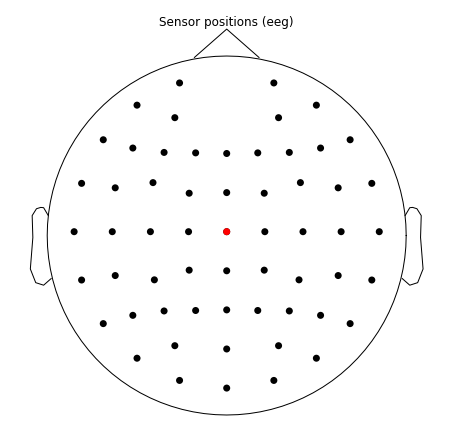

In [32]:
# for ferrara brainamp acticap
montage = mne.channels.read_montage('easycap-M1')
ch_names = montage.ch_names
remove_ch = ["Fpz", "Iz","F9", "F10", "P9", "P10", "O9", "O10", "AFz","FT9","FT10","TP9","TP10","PO9","PO10"]
a = numpy.nonzero(numpy.in1d(ch_names, remove_ch))[0]
ch_names = numpy.delete(ch_names,a)
montage = mne.channels.read_montage('easycap-M1',ch_names)
raw.set_montage(montage)
a=raw.plot_sensors()

(65, 15000)
(15000,)


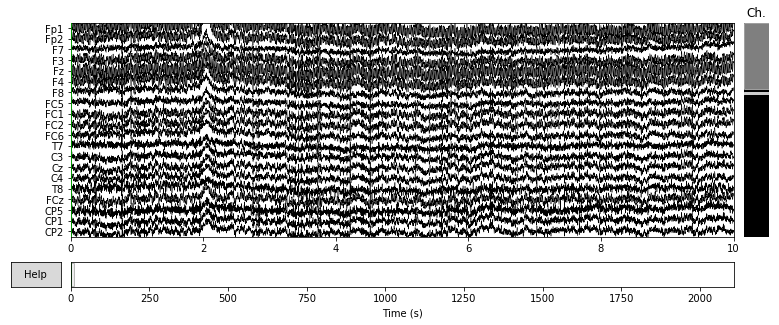

In [33]:
start, stop = raw.time_as_index([100, 115])  # 100 s to 115 s data segment
data, times = raw[:, start:stop]
print(data.shape)
print(times.shape)
data, times = raw[2:20:3, start:stop]  # access underlying data
a=raw.plot()

In [22]:
events = mne.find_events(raw, stim_channel='STI 014')
print(events[:5])

1202 events found
Event IDs: [ 4  5  6  7  8  9 10 11 15]
[[24712     0     7]
 [25729     0     9]
 [26229     0    11]
 [26345     0    15]
 [32448     0     7]]


In [23]:
raw_no_ref, _ = mne.set_eeg_reference(raw, [])

EEG data marked as already having the desired reference. Preventing automatic future re-referencing to an average reference.


EEG data marked as already having the desired reference. Preventing automatic future re-referencing to an average reference.
37 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-34-320793bede55>:12: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  a=evoked_no_ref.plot(titles=dict(eeg=title))


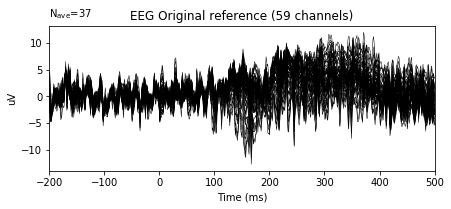

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-34-320793bede55>:13: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  a=evoked_no_ref.plot_topomap(times=[0.2], size=3., title=title)


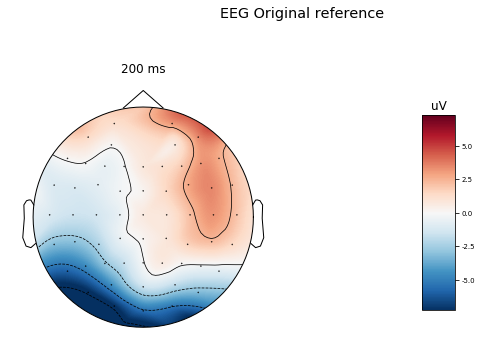

In [34]:
%matplotlib inline
raw_no_ref, _ = mne.set_eeg_reference(raw, [])

reject = dict(eeg=180e-6, eog=150e-6)
event_id, tmin, tmax = {'S':5}, -0.2, 0.5
epochs_params = dict(events=events, event_id=event_id, tmin=tmin, tmax=tmax,reject=reject)

evoked_no_ref = mne.Epochs(raw_no_ref, **epochs_params).average()
del raw_no_ref  # save memory

title = 'EEG Original reference'
a=evoked_no_ref.plot(titles=dict(eeg=title))
a=evoked_no_ref.plot_topomap(times=[0.2], size=3., title=title)

Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
37 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 1)
1 projection items activated
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-25-9dee4be8a5a4>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  a=evoked_car.plot(titles=dict(eeg=title))


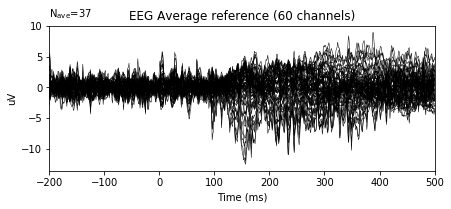

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-25-9dee4be8a5a4>:7: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  a=evoked_car.plot_topomap(times=[0.2], size=3., title=title)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


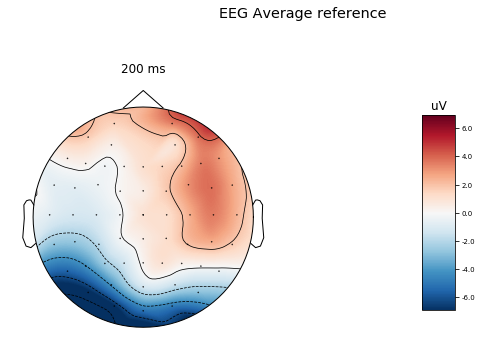

In [25]:
raw_car, _ = mne.set_eeg_reference(raw, 'average', projection=True)
evoked_car = mne.Epochs(raw_car, **epochs_params).average()
del raw_car  # save memory

title = 'EEG Average reference'
a=evoked_car.plot(titles=dict(eeg=title))
a=evoked_car.plot_topomap(times=[0.2], size=3., title=title)

In [35]:
event_id = {'left/auditory': 5, 'right/auditory': 6}
epochs_params = dict(events=events, event_id=event_id, tmin=tmin, tmax=tmax,
                     reject=reject)
epochs = mne.Epochs(raw, **epochs_params)

print(epochs)

79 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Epochs  |   79 events (good & bad), -0.2 - 0.5 sec, baseline [None, 0], ~159 kB, data not loaded,
 'left/auditory': 37
 'right/auditory': 42>


    Rejecting  epoch based on EEG : ['F4', 'F8', 'FC6', 'C4', 'T8', 'CP6', 'P8', 'F1', 'FC4', 'FT8', 'C6', 'TP7', 'TP8', 'PO8']
    Rejecting  epoch based on EOG : ['vEOGdown']
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-36-734391df3a76>:4: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  a=mne.combine_evoked([left, -right], weights='equal').plot_joint()


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-36-734391df3a76>:4: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  a=mne.combine_evoked([left, -right], weights='equal').plot_joint()


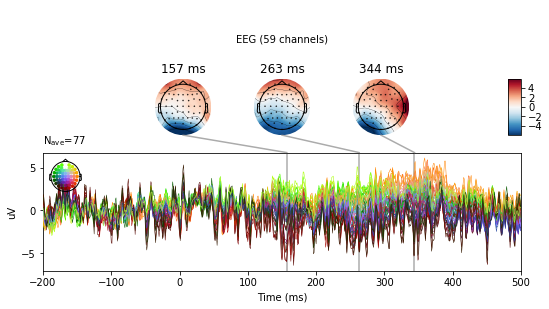

In [36]:
left, right = epochs["left"].average(), epochs["right"].average()

# create and plot difference ERP
a=mne.combine_evoked([left, -right], weights='equal').plot_joint()